In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = pd.read_csv('../data/Leases.csv')
data.head()

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
1,2018,Q1,1.0,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
2,2018,Q1,1.0,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
3,2018,Q1,1.0,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0
4,2018,Q1,1.0,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0


In [43]:
data.shape

(194685, 35)

In [44]:
data['market'].unique()

array(['Atlanta', 'Austin', 'Baltimore', 'Boston', 'Charlotte', 'Chicago',
       'Chicago Suburbs', 'Dallas/Ft Worth', 'Denver', 'Detroit',
       'Houston', 'Los Angeles', 'Manhattan', 'Nashville',
       'Northern New Jersey', 'Northern Virginia', 'Orange County',
       'Philadelphia', 'Phoenix', 'Raleigh/Durham', 'Salt Lake City',
       'San Diego', 'San Francisco', 'Seattle', 'South Bay/San Jose',
       'South Florida', 'Southern Maryland', 'Tampa', 'Washington D.C.'],
      dtype=object)

In [45]:
dallas = data[data['market'] == 'Dallas/Ft Worth']

In [46]:
dallas.head()

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
565,2018,Q1,1.0,Dallas/Ft Worth,10000 NCX,Dallas/Ft Worth_Central Expressway_Dallas_1000...,10000 N Central Expy,South,Dallas,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566,2018,Q1,1.0,Dallas/Ft Worth,1100 East Campbell,Dallas/Ft Worth_Richardson Telecom Corridor_Ri...,1100 E Campbell Rd,South,Richardson,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,2018,Q1,1.0,Dallas/Ft Worth,1111 Tower,Dallas/Ft Worth_Stemmons_Dallas_1111 Tower_111...,1111 W Mockingbird Ln,South,Dallas,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
568,2018,Q1,1.0,Dallas/Ft Worth,1111 Tower,Dallas/Ft Worth_Stemmons_Dallas_1111 Tower_111...,1111 W Mockingbird Ln,South,Dallas,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,2018,Q1,1.0,Dallas/Ft Worth,1111 Tower,Dallas/Ft Worth_Stemmons_Dallas_1111 Tower_111...,1111 W Mockingbird Ln,South,Dallas,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
dallas.shape

(15272, 35)

In [48]:
dallas = dallas.dropna(axis=1, how='all')

In [49]:
dallas.isna().sum()

year                           0
quarter                        0
monthsigned                   11
market                         0
building_name               2073
building_id                    0
address                        0
region                         0
city                           0
state                          0
zip                            0
internal_submarket             0
internal_class                 6
leasedSF                       0
company_name               13546
internal_industry          14413
transaction_type              13
internal_market_cluster    14484
costarID                       0
space_type                   145
CBD_suburban                   0
dtype: int64

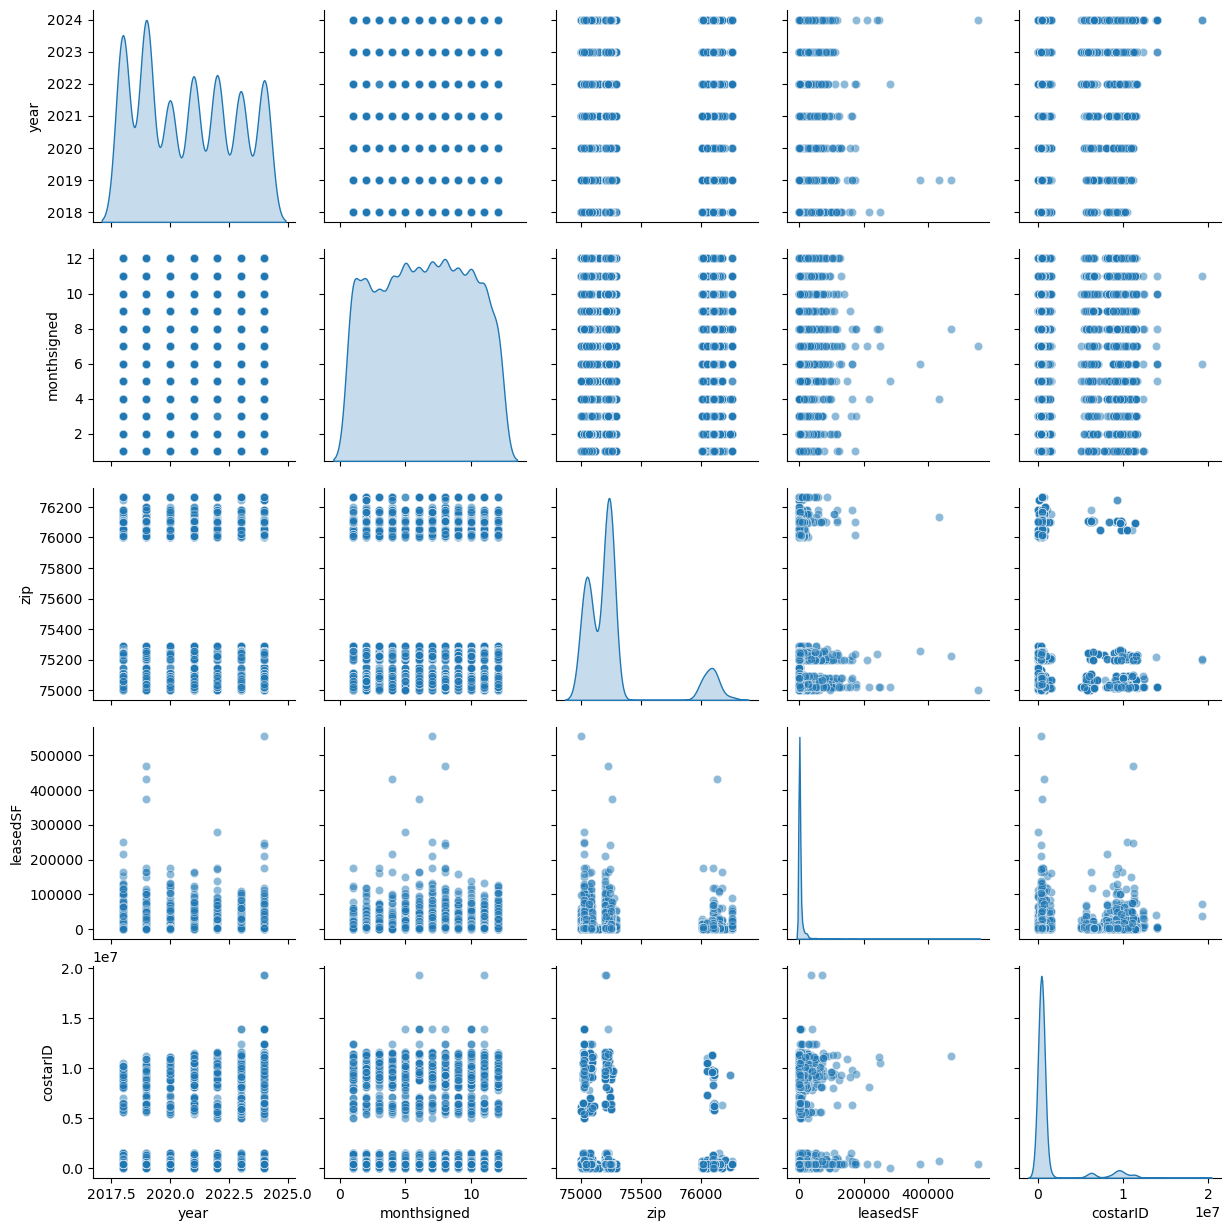

In [50]:
sns.pairplot(dallas, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

In [51]:
dallas['leasedSF'].describe()

count     15272.000000
mean       5398.606273
std       14334.371295
min          20.000000
25%        1053.750000
50%        2134.000000
75%        4355.250000
max      553799.000000
Name: leasedSF, dtype: float64

In [52]:
small_lease = dallas[dallas['leasedSF'] < 5000]
small_lease.shape

(11896, 21)

(array([428., 891., 625., 541., 545., 646., 622., 653., 618., 627., 541.,
        513., 497., 454., 447., 407., 372., 342., 271., 269., 232., 211.,
        207., 190., 163., 131., 110., 115., 110., 118.]),
 array([  20.        ,  185.93333333,  351.86666667,  517.8       ,
         683.73333333,  849.66666667, 1015.6       , 1181.53333333,
        1347.46666667, 1513.4       , 1679.33333333, 1845.26666667,
        2011.2       , 2177.13333333, 2343.06666667, 2509.        ,
        2674.93333333, 2840.86666667, 3006.8       , 3172.73333333,
        3338.66666667, 3504.6       , 3670.53333333, 3836.46666667,
        4002.4       , 4168.33333333, 4334.26666667, 4500.2       ,
        4666.13333333, 4832.06666667, 4998.        ]),
 <BarContainer object of 30 artists>)

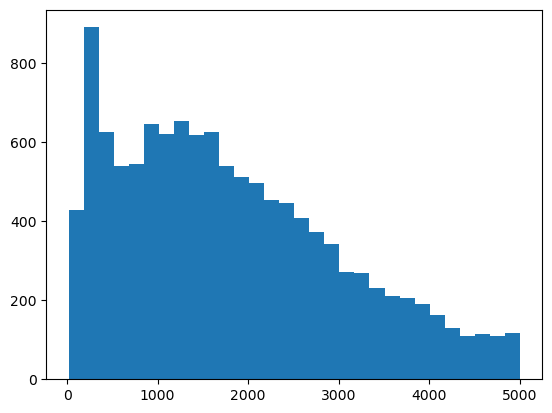

In [53]:
plt.hist(small_lease['leasedSF'], bins=30)

In [54]:
dallas.columns

Index(['year', 'quarter', 'monthsigned', 'market', 'building_name',
       'building_id', 'address', 'region', 'city', 'state', 'zip',
       'internal_submarket', 'internal_class', 'leasedSF', 'company_name',
       'internal_industry', 'transaction_type', 'internal_market_cluster',
       'costarID', 'space_type', 'CBD_suburban'],
      dtype='object')

In [55]:
dallas.head()

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,internal_submarket,internal_class,leasedSF,company_name,internal_industry,transaction_type,internal_market_cluster,costarID,space_type,CBD_suburban
565,2018,Q1,1.0,Dallas/Ft Worth,10000 NCX,Dallas/Ft Worth_Central Expressway_Dallas_1000...,10000 N Central Expy,South,Dallas,TX,...,Central Expressway,A,3923.0,NaN,NaN,New,NaN,410032,Relet,Suburban
566,2018,Q1,1.0,Dallas/Ft Worth,1100 East Campbell,Dallas/Ft Worth_Richardson Telecom Corridor_Ri...,1100 E Campbell Rd,South,Richardson,TX,...,Richardson Telecom Corridor,O,1216.0,NaN,NaN,New,NaN,414337,Relet,Suburban
567,2018,Q1,1.0,Dallas/Ft Worth,1111 Tower,Dallas/Ft Worth_Stemmons_Dallas_1111 Tower_111...,1111 W Mockingbird Ln,South,Dallas,TX,...,Stemmons,O,830.0,NaN,NaN,New,NaN,409416,Relet,Suburban
568,2018,Q1,1.0,Dallas/Ft Worth,1111 Tower,Dallas/Ft Worth_Stemmons_Dallas_1111 Tower_111...,1111 W Mockingbird Ln,South,Dallas,TX,...,Stemmons,O,1193.0,NaN,NaN,New,NaN,409416,Relet,Suburban
569,2018,Q1,1.0,Dallas/Ft Worth,1111 Tower,Dallas/Ft Worth_Stemmons_Dallas_1111 Tower_111...,1111 W Mockingbird Ln,South,Dallas,TX,...,Stemmons,O,1870.0,NaN,NaN,New,NaN,409416,Relet,Suburban


In [ ]:
company = pd.read_csv('../external_data/company.txt', sep=';', header=None)
company.head()

,0,1,2,3,4,5,6,7
0,Capital Investment Advisors,NaN,pts,78,12 pts,60.0,11-50,Capital Investment Advisors: ABN Newswire — Po...
1,Efk Moen,NaN,pts,89,16 pts,81.0,11-50,NaN
2,Kimley-Horn,NaN,pts,92,14 pts,74.0,5001-10000,Kimley-Horn: Seattle TechFlash — Firefly Park ...
3,Square,87.0,-5 pts,84,22 pts,94.0,1001-5000,Square: PYMNTS.com — Earnings Season Points to...
4,Velocity Technology Partners,91.0,3 pts,83,12 pts,96.0,11-50,NaN


In [57]:
company.isna().sum()

0     0
1    90
2     0
3     0
4     0
5    49
6     8
7    66
dtype: int64

In [59]:
company.shape

(201, 8)